In [1]:
import numpy as np 
import pandas as pd
from scipy import stats
import seaborn as sns
from scipy.stats import norm
from collections import Counter                      
import matplotlib.pyplot as plt             
%matplotlib inline    
%config IPCompleter.greedy=True
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
import datetime as dt

In [3]:
MG = pd.read_csv('margarine-data.csv')
#MG.head()

In [4]:
MG['Time'] = pd.to_datetime(MG['Time'])
#MG

In [5]:
MG = MG.dropna()

In [6]:
#MG

In [7]:
df1= MG.groupby(["Time", "Price per Unit", "Total sales"]).sum().reset_index()

In [8]:
value_count = len(df1['Price per Unit'] == 'Value_To_Count')

print('Number of rows with the value:', value_count)

Number of rows with the value: 35969


In [9]:
#MG.isnull().sum()

In [10]:
Price_unit = df1.groupby('Time').mean()['Price per Unit'].reset_index()
Total_sales= df1.groupby('Time').mean()['Total sales'].reset_index()

In [11]:
Price_unit.columns = ['ds','y']
Total_sales.columns = ['ds','y']

In [12]:
#Price_unit.head()

In [13]:
#Total_sales.head()

In [14]:
#pip install prophet

In [15]:
from prophet import Prophet

In [16]:
from prophet import Prophet
u_price_model = Prophet(interval_width=0.95,weekly_seasonality = True)
u_price_model.fit(Price_unit)
future_u_price = u_price_model.make_future_dataframe(periods=50,freq='w')
future_confirmed = future_u_price.copy() # for non-baseline predictions later on
future_u_price.tail()

23:45:07 - cmdstanpy - INFO - Chain [1] start processing
23:45:07 - cmdstanpy - INFO - Chain [1] done processing


,ds
305,2023-11-19
306,2023-11-26
307,2023-12-03
308,2023-12-10
309,2023-12-17


In [17]:
forecast_u_price = u_price_model.predict(future_u_price)
forecast_u_price[['ds', 'yhat', 'yhat_lower', 'yhat_upper','trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
305,2023-11-19,3.857066,3.630912,4.081350,3.840324,3.666093,4.015742
306,2023-11-26,3.888729,3.678317,4.101383,3.855085,3.680113,4.034676
307,2023-12-03,3.893972,3.677838,4.123504,3.869845,3.690748,4.053587
308,2023-12-10,3.875996,3.645128,4.104496,3.884606,3.699092,4.072346
309,2023-12-17,3.858547,3.628627,4.086001,3.899367,3.706556,4.091450


In [18]:
forecast_u_price.to_excel(r'C:\Users\arshi\OneDrive\Desktop\unit_price.xlsx')

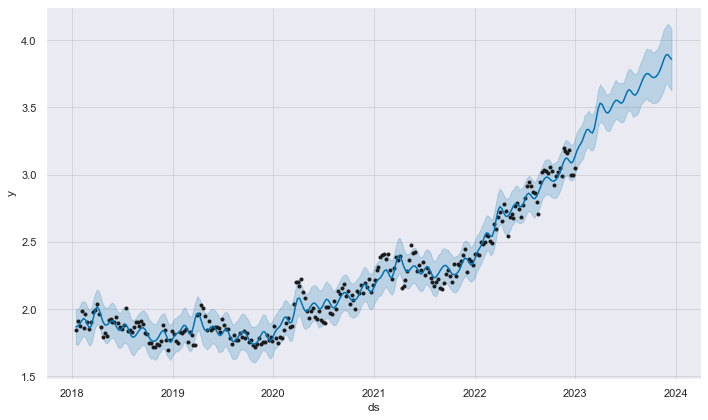

In [19]:
Model_forecast_plot = u_price_model.plot(forecast_u_price)

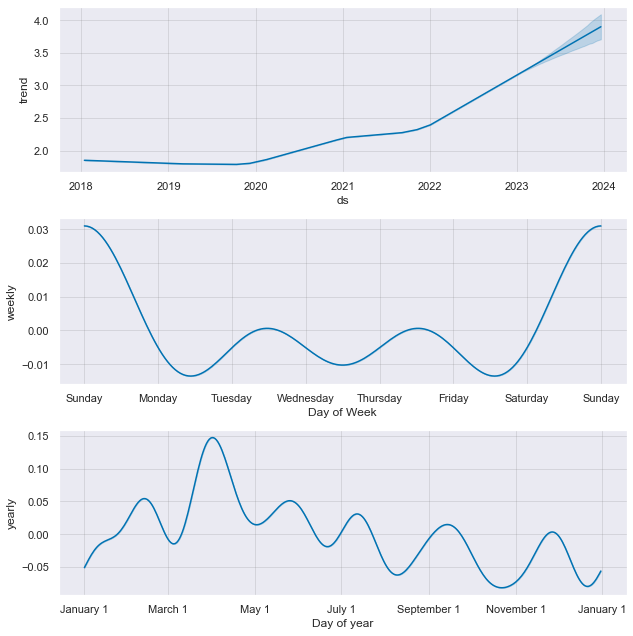

In [20]:
forecast_components = u_price_model.plot_components(forecast_u_price)

In [21]:
df2= MG.groupby(["Time", "Price per Volume", "Total sales"]).sum().reset_index()

In [22]:
Price_volume = df2.groupby('Time').mean()['Price per Volume'].reset_index()
Total_sales= df2.groupby('Time').mean()['Total sales'].reset_index()

In [23]:
Price_volume.columns = ['ds','y']

In [24]:
#Price_volume.head()

In [25]:
#MG.Time

In [26]:
#Price_volume

In [27]:
from prophet import Prophet
v_price_model = Prophet(interval_width=0.95, weekly_seasonality = True)
v_price_model.fit(Price_volume)
future_v_price = v_price_model.make_future_dataframe(periods=50,freq='w')
future_confirmed = future_v_price.copy() # for non-baseline predictions later on
future_v_price.tail()

23:45:24 - cmdstanpy - INFO - Chain [1] start processing
23:45:24 - cmdstanpy - INFO - Chain [1] done processing


,ds
305,2023-11-19
306,2023-11-26
307,2023-12-03
308,2023-12-10
309,2023-12-17


In [28]:
forecast_v_price = v_price_model.predict(future_v_price)
forecast_v_price[['ds', 'yhat', 'yhat_lower', 'yhat_upper','trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
305,2023-11-19,3.628221,3.135280,4.097672,3.650550,3.385445,3.968845
306,2023-11-26,3.633846,3.188551,4.094485,3.652362,3.376838,3.985078
307,2023-12-03,3.626239,3.156559,4.124624,3.654175,3.370276,4.002526
308,2023-12-10,3.610525,3.112299,4.139922,3.655988,3.363547,4.014061
309,2023-12-17,3.602124,3.097149,4.102778,3.657800,3.357798,4.025554


In [29]:
forecast_v_price.to_excel(r'C:\Users\arshi\OneDrive\Desktop\volume_price.xlsx')

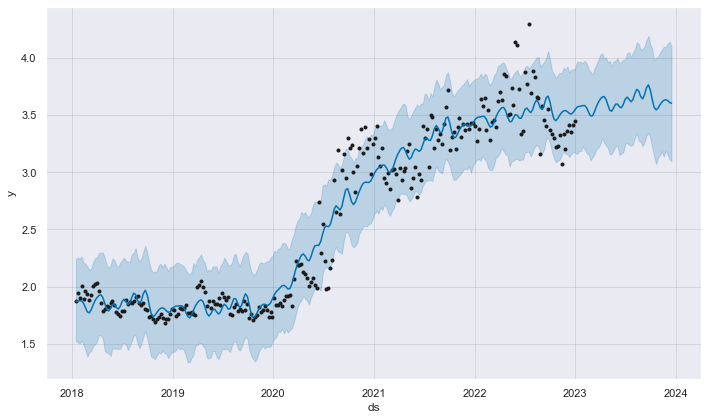

In [30]:
Model_forecast_plot = v_price_model.plot(forecast_v_price)

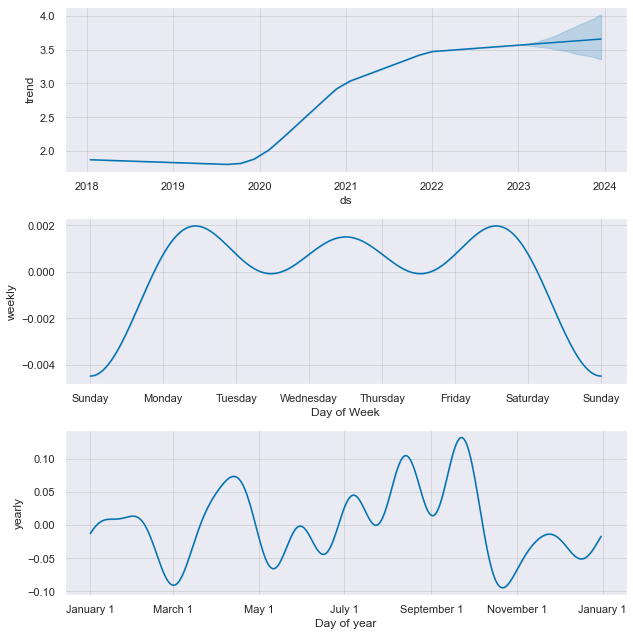

In [31]:
forecast_components = v_price_model.plot_components(forecast_v_price)

In [32]:
Total_sales.columns = ['ds','y']

In [33]:
#Total_sales

In [34]:
from prophet import Prophet
sales_model = Prophet(interval_width=0.95, weekly_seasonality = True)
sales_model.fit(Total_sales)
future_sales = sales_model.make_future_dataframe(periods=50,freq='w')
future_confirmed = future_sales.copy() # for non-baseline predictions later on
future_sales.tail()

23:45:32 - cmdstanpy - INFO - Chain [1] start processing
23:45:32 - cmdstanpy - INFO - Chain [1] done processing


,ds
305,2023-11-19
306,2023-11-26
307,2023-12-03
308,2023-12-10
309,2023-12-17


In [35]:
forecast_sales = sales_model.predict(future_sales)
forecast_sales[['ds', 'yhat', 'yhat_lower', 'yhat_upper','trend', 'trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
305,2023-11-19,14235.507282,9308.468654,19493.253252,12751.208833,12671.833614,12826.988498
306,2023-11-26,15044.275974,9992.572087,20129.935213,12757.111725,12675.254929,12834.990131
307,2023-12-03,15434.261959,10057.099714,20718.214284,12763.014617,12677.497493,12843.191136
308,2023-12-10,16071.513201,11102.265723,21206.602852,12768.917510,12679.903267,12851.687518
309,2023-12-17,16913.691209,12000.169246,21904.030836,12774.820402,12683.473298,12860.502047


In [36]:
forecast_sales.to_excel(r'C:\Users\arshi\OneDrive\Desktop\sales.xlsx')

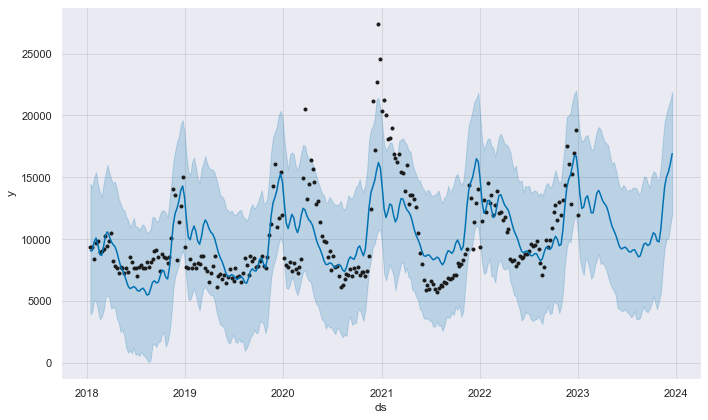

In [37]:
Model_forecast_plot = sales_model.plot(forecast_sales)

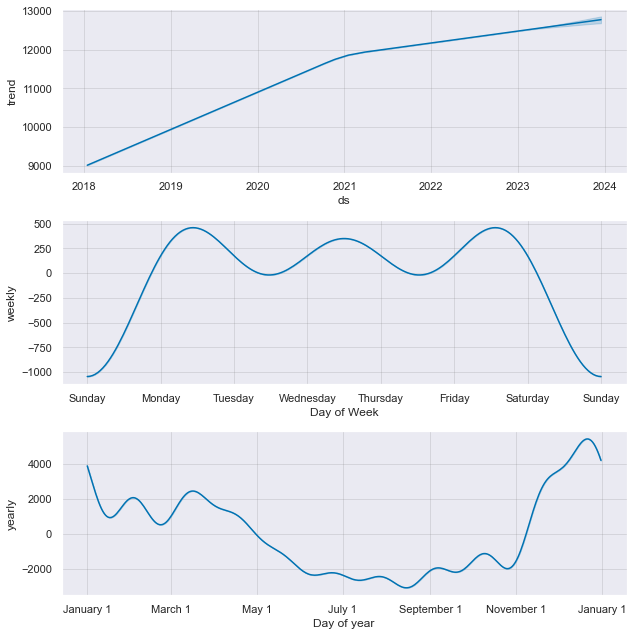

In [38]:
forecast_components = sales_model.plot_components(forecast_sales)